In [5]:
import pandas as pd

In [6]:
df_netflix = pd.read_csv('datasets/netflix_daily_top_10.csv')

In [7]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [8]:
# Tipos de dados de cada coluna
print("Tipos de dados:")
print(df_netflix.dtypes)
print("\n" + "="*50 + "\n")
print("Resumo dos tipos:")
print(df_netflix.dtypes.value_counts())

Tipos de dados:
As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object


Resumo dos tipos:
object    7
int64     3
Name: count, dtype: int64


In [9]:
# Convertendo a coluna 'As of' para datetime para análise do período
df_netflix['As of'] = pd.to_datetime(df_netflix['As of'])

print("Período da análise:")
print(f"Data inicial: {df_netflix['As of'].min()}")
print(f"Data final: {df_netflix['As of'].max()}")
print(f"Duração: {(df_netflix['As of'].max() - df_netflix['As of'].min()).days} dias")

Período da análise:
Data inicial: 2020-04-01 00:00:00
Data final: 2022-03-11 00:00:00
Duração: 709 dias


In [10]:
# Tamanho da base de dados
print("Tamanho da base de dados:")
print(f"Número de linhas: {df_netflix.shape[0]}")
print(f"Número de colunas: {df_netflix.shape[1]}")
print(f"Total de células: {df_netflix.shape[0] * df_netflix.shape[1]}")
print(f"\nMemória utilizada: {df_netflix.memory_usage(deep=True).sum() / 1024:.2f} KB")

Tamanho da base de dados:
Número de linhas: 7100
Número de colunas: 10
Total de células: 71000

Memória utilizada: 2495.88 KB


In [11]:
# Verificação de valores nulos
print("Valores nulos por coluna:")
print(df_netflix.isnull().sum())
print("\n" + "="*50 + "\n")
print("Percentual de valores nulos:")
print((df_netflix.isnull().sum() / len(df_netflix) * 100).round(2).astype(str) + '%')

Valores nulos por coluna:
As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64


Percentual de valores nulos:
As of                     0.0%
Rank                      0.0%
Year to Date Rank         0.0%
Last Week Rank            0.0%
Title                     0.0%
Type                      0.0%
Netflix Exclusive       35.23%
Netflix Release Date      0.0%
Days In Top 10            0.0%
Viewership Score          0.0%
dtype: object


Análise de Outliers (método IQR):

Rank:
  Q1: 3.0, Q3: 8.0, IQR: 5.0
  Limite inferior: -4.5, Limite superior: 15.5
  Número de outliers: 0 (0.00%)
  Valores min: 1, max: 10

Days In Top 10:
  Q1: 3.0, Q3: 18.0, IQR: 15.0
  Limite inferior: -19.5, Limite superior: 40.5
  Número de outliers: 743 (10.46%)
  Valores min: 1, max: 428

Viewership Score:
  Q1: 19.0, Q3: 128.0, IQR: 109.0
  Limite inferior: -144.5, Limite superior: 291.5
  Número de outliers: 698 (9.83%)
  Valores min: 1, max: 1474



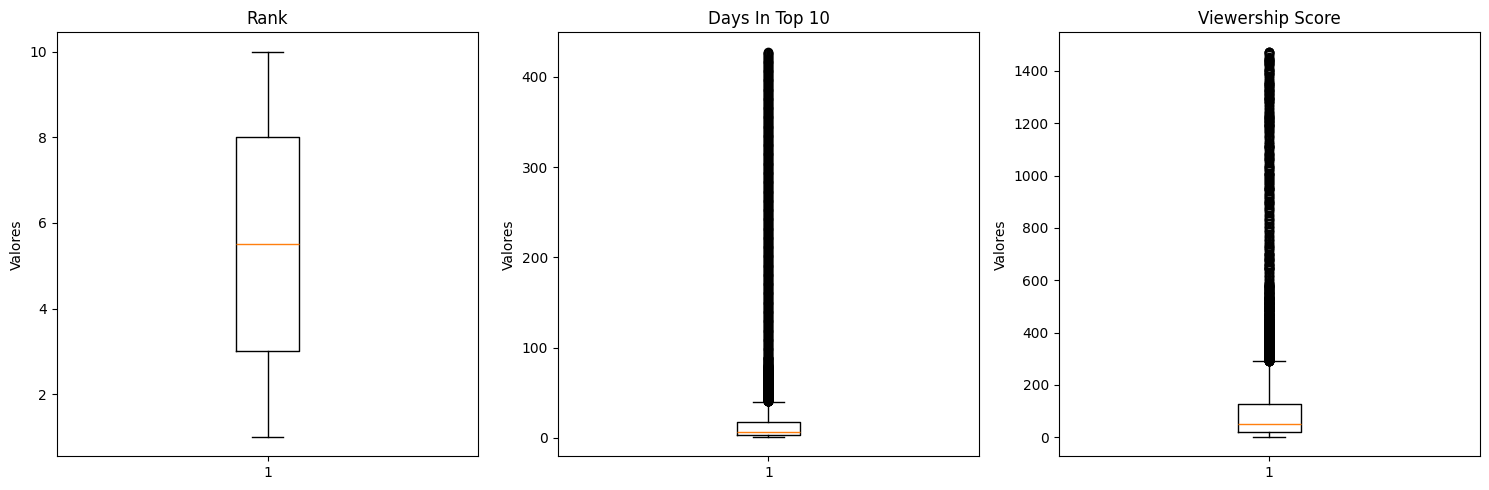

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Selecionando colunas numéricas para análise de outliers
numeric_cols = df_netflix.select_dtypes(include=[np.number]).columns

print("Análise de Outliers (método IQR):\n")

for col in numeric_cols:
    Q1 = df_netflix[col].quantile(0.25)
    Q3 = df_netflix[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_netflix[(df_netflix[col] < lower_bound) | (df_netflix[col] > upper_bound)]
    
    print(f"{col}:")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Limite inferior: {lower_bound}, Limite superior: {upper_bound}")
    print(f"  Número de outliers: {len(outliers)} ({len(outliers)/len(df_netflix)*100:.2f}%)")
    print(f"  Valores min: {df_netflix[col].min()}, max: {df_netflix[col].max()}")
    print()

# Visualização dos outliers
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
if len(numeric_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df_netflix[col])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Valores')

plt.tight_layout()
plt.show()